# Analysis of Mental Health Survey in Technology-Realted Jobs

In [1]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn import mixture

In [2]:
# Reading the data 
df = pd.read_csv('C:/Users/FILI DANI/Desktop/Machine Learning/mental-heath-in-tech-2016_20161114.csv')
print(df.head())

   Are you self-employed?  \
0                       0   
1                       0   
2                       0   
3                       1   
4                       0   

  How many employees does your company or organization have?  \
0                                             26-100           
1                                               6-25           
2                                               6-25           
3                                                NaN           
4                                               6-25           

   Is your employer primarily a tech company/organization?  \
0                                                1.0         
1                                                1.0         
2                                                1.0         
3                                                NaN         
4                                                0.0         

   Is your primary role within your company related to tech/IT?  \


## Data Preparation

Renaming Columns

In [3]:
# Name of columns need to be renamed as they are too long 
new_column_names = ['Self_employed','Number_of_Employees','Tech_company_or_Organization','Is_role_tech_or_IT',
                    'Is_mental_health_part_of_healthcare_coverage','Availability_of_options_for_mental_health_care_under_employer_provided_coverage',
                    'Employer_discusses_mental_health','Resources_or_help_about_mental_health','Privacy_in_using_mental_health_resources',
                    'Difficulty_in_obtaining_mental_health_leave','Negative_consequences_in_discussing_mental_health_with_employer',
                    'Negative_consequences_in_discussing_physical_health_with_employer','Comfortability_in_discussing_mental_health_with_coworkers',
                    'Comfortability_in_discussing_mental_health_with_direct_supervisor','Mental_health_has_same_attention_as_physical_health',
                    'Negative_consequences_for_co-workers_open_about_mental_health','Medical_coverage_that_includes_mental_health',
                    'Knowledge_of_mental_health_resources','Revealing_of_past_mental_health_diagnosis_to_clients',
                    'Negative_impact_of_revealing_past_mental_health_diagnosis_to_clients','Revealing_of_past_mental_health_diagnosis_to_coworkers',
                    'Negative_impact_of_revealing_past_mental_health_to_coworker','Effect_of_mental_health_on_productivity',
                    'Percentage_of_work_time_affected_by_mental_health','Previous_employers','Previous_employers_provided_mental_health_benefits',
                    'Awareness_of_mental_health_options_provided_by_previous_employers','Previous_employers_discussed_mental_health',
                    'Previous_employers_provided_mental_health_resorces','Privacy_in_using_mental_health_resources_with_previous_employers',
                    'Negative_consequences_in_discussing_mental_health_with_previous_employers','Negative_consequences_in_discussing_physical_health_with_previous_employers',
                    'Comfortability_of_discussing_mental_health_with_previous_co-workers','Comfortability_of_discussing_mental_health_with_previous_direct_supervisor',
                    'Mental_health_had_same_attention_as_physical_health_by_previous_employers','Negative_consequences_for_co-workers_open_about_mental_health_in_previous_workplace',
                    'Physical_health_in_interview','Why_or_why_not_physical_health','Mental_health_in_interview','Why_or_why_not_mental_health','Career_degradation_due_to_mental_health',
                    'Co-workers_negative_view_if_suffer_from_mental_health','Willingness_to_share_mental_illness_with_family_or_friends','Bad_experience_with_mental_health_in_previous_or_current_workplace',
                    'Negative_impact_of_dicussing_mental_health_due_to_another_individual_who_suffers','Family_history_of_mental_illness','History_of_mental_health_disorder',
                    'Current_condition_of_mental_health_disorder','If_diagonised_before_what_condition','If_maybe_diagonised_what_condition','Diagonised_by_medical_professional',
                    'If_yes_what_condition_diagonised_with','Sought_treatment_from_mental_health_professional','Interference_of_mental_health_when_in_treatment',
                    'Interference_of_mental_health_when_not_in_treatment','Age','Gender','Residence_country','Residence_US_state','Working_country','Working_US_state','Work_position','Work_remotely']
df.columns = new_column_names

Handling of Missing Values

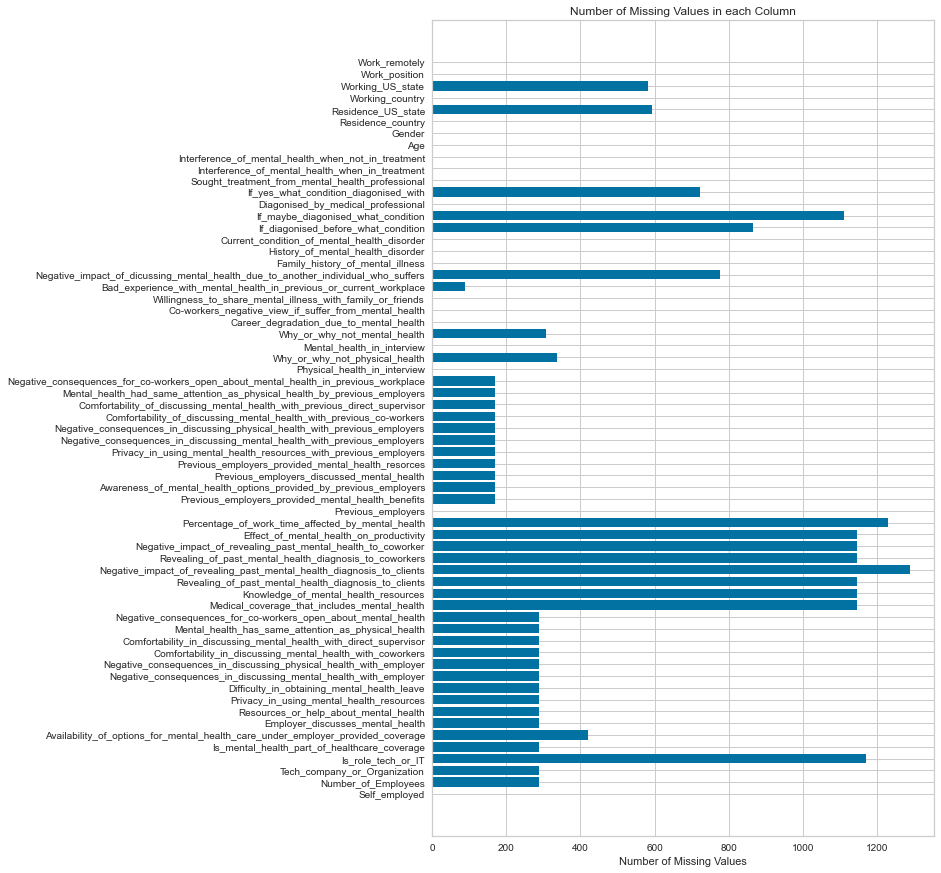

In [4]:
# Horizontal bar chart of missing values
fig , ax = plt.subplots(figsize=(9,15))
ax.barh(df.columns,df.isnull().sum())
ax.set_title('Number of Missing Values in each Column')
ax.set_xlabel('Number of Missing Values')
plt.show()

In [5]:
# Drop columns with 50% or over 50% missing values
df = df.drop(df.columns[df.isnull().mean()>=0.5],axis=1)

In [6]:
# Checking columns with over 10 unique number of entries
for column in df.columns:
    if len(df[column].unique()) > 10:
        print(len(df[column].unique()),column)

1086 Why_or_why_not_physical_health
1081 Why_or_why_not_mental_health
53 Age
71 Gender
53 Residence_country
48 Residence_US_state
53 Working_country
49 Working_US_state
264 Work_position


In [7]:
# Checking the unique entries in columns with over 10 unique number of entries
for column in df.columns:
    if len(df[column].unique())>10:
        print(column,df[column].unique())

Why_or_why_not_physical_health [nan
 'It would depend on the health issue. If there is a health issue that would not immediately affect my job performance, such as diabetes, I would not bring it up during the interview. If it was something more severe, such as narcolepsy, I might bring it up depending on how controlled it was.'
 'They would provable need to know, to Judge if I can do my job or not. '
 ... ' QF'
 'Fear that doing so would cause the employer to factor in additional health insurance expense.'
 'Stigma with some diseases']
Why_or_why_not_mental_health [nan
 'While mental health has become a more prominent issue recently, I feel like there is still a lot of stigma surrounding it. At this point, with our culture, I would not bring it up. I hope that within the next 20-30 years that stigma will be gone and it can be brought up safely in an interview.'
 'Stigma, mainly. ' ... 'E'
 'Fear that the employer would consider additional health insurance expense and would doubt my abi

In [8]:
# Dropping both  Why_or_why_not_physical_health and Why_or_why_not_mental_health due to many unique entries
df = df.drop(columns=['Why_or_why_not_physical_health','Why_or_why_not_mental_health'])

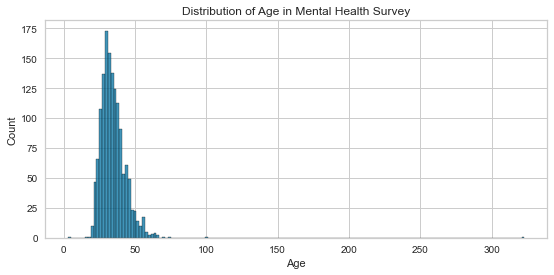

In [9]:
# Distribution of Age column
fig ,ax = plt.subplots(figsize=(9,4))
sns.histplot(data=df,x=df['Age'],ax=ax,binwidth=2)
ax.set_title('Distribution of Age in Mental Health Survey')
plt.show()

In [10]:
# Drop age values that exceed 75 or are less than 18
age_values_drop = df[(df['Age']<18) | (df['Age'] > 75)].index
df.drop(age_values_drop,inplace=True)
print(df['Age'].unique())

[39 29 38 43 42 30 37 44 28 34 35 52 32 25 31 26 33 27 36 40 46 41 45 19
 21 24 23 22 51 48 55 50 49 20 54 47 56 57 63 61 62 53 58 66 59 65 74 70]


In [11]:
# Examining Gender column
print(df['Gender'].unique())

['Male' 'male' 'Male ' 'Female' 'M' 'female' 'm' 'I identify as female.'
 'female ' 'Bigender' 'non-binary' 'Female assigned at birth ' 'F' 'Woman'
 'man' 'fm' 'f' 'Cis female ' 'Transitioned, M2F'
 'Genderfluid (born female)' 'Other/Transfeminine'
 'Female or Multi-Gender Femme' 'Female ' 'woman' 'female/woman'
 'Cis male' 'Male.' 'Androgynous' 'male 9:1 female, roughly' nan
 'Male (cis)' 'nb masculine' 'Cisgender Female' 'Man' 'Sex is male'
 'none of your business' 'genderqueer' 'cis male' 'Human' 'Genderfluid'
 'Enby' 'Malr' 'genderqueer woman' 'mtf' 'Queer' 'Agender' 'Dude' 'Fluid'
 "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? "
 'mail' 'M|' 'Male/genderqueer' 'fem' 'Nonbinary' 'male ' 'human'
 'Female (props for making this a freeform field, though)' ' Female'
 'Unicorn' 'Cis Male' 'Male (trans, FtM)' 'Cis-woman' 'Genderqueer'
 'cisdude' 'Genderflux demi-girl'
 'female-

In [12]:
# Grouping participants who identified as male together and those who identified as female together
unique_male_values = ['Male','M','Male ','male','m','man','Cis male','Male.','Male (cis)','Man','Sex is male',
                     'cis male','Malr','Dude',"I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
                     'mail','M|','male ','Cis Male','cis man','cisdude','MALE']
for value in unique_male_values:
    df.loc[df['Gender'] == value,'Gender'] = 'Male'
unique_female_values = ['Female','female','I identify as female.','female ','Female assigned at birth ','F','Woman','fm','f',
                        'Cis female ','Genderfluid (born female)','Female or Multi-Gender Femme','Female ','woman','female/woman',
                        'Cisgender Female','fem','Female (props for making this a freeform field, though)',' Female','Cis-woman']
for value in unique_female_values:
    df.loc[df['Gender'] == value,'Gender'] = 'Female'

In [13]:
# Grouping the other unique entries in Gender column as 'other'
df.loc[(~(df['Gender'].isin(['Male','Female']))) & (~(df['Gender'].isnull())),'Gender'] = 'Other'

In [14]:
# Dropping the other columns with over 10 unique entries
df = df.drop(columns = ['Residence_country','Residence_US_state','Working_country','Working_US_state','Work_position'])

In [15]:
# Replacing missing values in each column with mode
for column in df.columns:
    mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    df[column] = mode.fit_transform(df[[column]])

# Dimensionality Reduction

Applying PCA

In [16]:
# Keeping original data
df_encoded = df.iloc[:,0:43]

In [17]:
# Encoding the dataset
for column in df_encoded.columns:
    if df_encoded[column].dtype == type(object):
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])

In [18]:
# Standarizing the data points
std = StandardScaler().fit_transform(df_encoded)

In [19]:
# Retrieving the covariance matrix
pca = PCA()
pca.fit_transform(std)
print(pca.get_covariance())

[[ 1.00070077 -0.21161993  0.23794091 ...  0.17315591 -0.0087581
  -0.13405326]
 [-0.21161993  1.00070077 -0.26644474 ...  0.03979047  0.00595477
   0.0850437 ]
 [ 0.23794091 -0.26644474  1.00070077 ... -0.07499997  0.03233817
  -0.10996463]
 ...
 [ 0.17315591  0.03979047 -0.07499997 ...  1.00070077 -0.06661824
  -0.03002178]
 [-0.0087581   0.00595477  0.03233817 ... -0.06661824  1.00070077
   0.03049334]
 [-0.13405326  0.0850437  -0.10996463 ... -0.03002178  0.03049334
   1.00070077]]


In [20]:
# Retrieving eigenvalues and eigenvectors
eig_val = pca.explained_variance_
eig_vec = pca.components_

In [21]:
# Selecting the number of Pricipal Components to use
tot = sum(eig_val)
exp_var = eig_val/tot * 100
cum_sum_exp_var = np.cumsum(exp_var)
number_of_pca = []
for pca in cum_sum_exp_var:
    if pca <=95:
        number_of_pca.append(pca)
print(len(number_of_pca))

36


In [22]:
# Transforming dataset through PCA 
pca = PCA(n_components=36)
pca = pca.fit_transform(std)

# Modeling

K-Means Algorithm

In [23]:
# Splitting dataset into training and testing data
training,testing = train_test_split(pca,test_size=0.2,random_state=0)

C:\Users\FILI DANI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


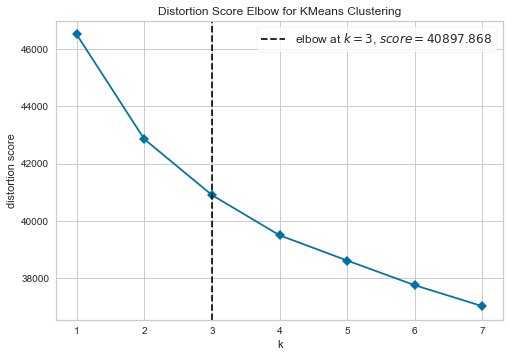

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# Deciding on the number of cluster to use
model = KMeans()
elbow_visualizer = KElbowVisualizer(model,k=(1,8),timings=False)
elbow_visualizer.fit(training)
elbow_visualizer.show()

In [25]:
# Modeling KMeans with 3 number of clusters
KMeans = KMeans(n_clusters=3)
KMeans.fit(training)

KMeans(n_clusters=3)

In [26]:
# Making predictions for training and testing data
kmeans_predictions_train = KMeans.fit_predict(training)
print('Training data predictions',kmeans_predictions_train)
kmeans_predictions_test = KMeans.fit_predict(testing)
print('Tesing data predictions',kmeans_predictions_test)

Training data predictions [0 1 1 ... 0 1 1]
Tesing data predictions [1 2 2 1 1 2 2 2 2 1 2 2 0 1 2 1 2 2 2 2 2 2 1 2 0 1 0 0 2 2 1 2 0 2 0 2 1
 2 0 0 2 1 1 1 1 0 1 1 2 2 1 2 2 0 1 1 2 1 1 0 0 1 1 0 2 1 2 2 1 1 1 1 1 2
 2 1 0 0 1 1 2 1 1 1 0 1 2 0 2 2 2 2 1 1 0 2 0 2 2 1 1 2 1 2 1 2 0 0 0 2 1
 0 2 1 1 1 2 0 1 2 2 2 1 0 0 2 0 0 1 1 0 1 0 1 0 1 2 2 2 2 2 1 0 1 2 0 0 0
 0 0 1 1 1 0 1 1 1 2 2 2 0 2 1 1 2 2 2 1 1 0 1 2 1 2 1 2 2 1 2 0 2 2 2 0 2
 1 2 1 2 1 1 2 2 0 2 0 2 1 1 1 2 1 1 1 2 2 1 2 0 2 1 1 1 1 0 2 0 0 2 1 0 1
 2 0 1 0 1 1 0 0 1 1 1 0 2 2 0 2 2 2 2 2 1 1 2 2 1 2 0 0 1 0 1 1 2 0 2 0 2
 1 0 0 2 1 1 2 2 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 1]


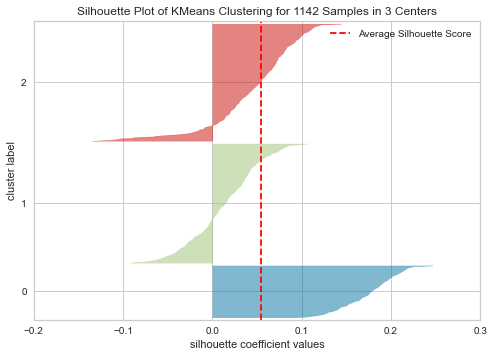

Score for training data 0.05972562809994093


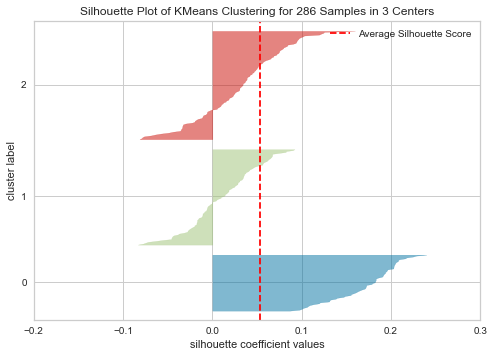

Score for testing data 0.05318339901735711


In [27]:
# Evaluating KMeans with silhouette score for both training and testing data
def silhouetter_visual(dataset):
    visualizer = SilhouetteVisualizer(KMeans,colors='yellowbrick')
    visualizer.fit(dataset)
    visualizer.show()
# Trainig data
silhouetter_visual(training)
kmeans_score_train = silhouette_score(training,kmeans_predictions_train)
print('Score for training data',kmeans_score_train)
# Tesing data 
silhouetter_visual(testing)
kmeans_score_test = silhouette_score(testing,kmeans_predictions_test)
print('Score for testing data',kmeans_score_test)

Gausian Mixture Model 

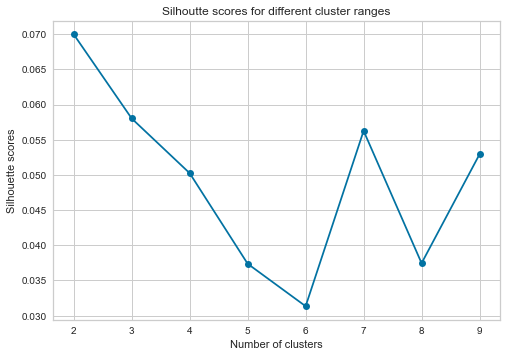

In [28]:
# Deciding on the number of clusters to use
scores = []
for cluster in range(2,10):
    gmm = mixture.GaussianMixture(n_components=cluster)
    gmm.fit(training)
    predictions = gmm.predict(training)
    scores.append(silhouette_score(training,predictions))
fig , ax = plt.subplots()
ax.plot(range(2,10),scores,linestyle='-',marker='o')
ax.set_title('Silhoutte scores for different cluster ranges')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette scores')
plt.show()

In [29]:
# Modeling GMM with 2 number of clusters 
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(training)

GaussianMixture(n_components=2)

In [30]:
# Making predictions for training and testing data
gmm_predictions_train = gmm.predict(training)
print('Training data predictions',gmm_predictions_train)
gmm_predictions_test = gmm.predict(testing)
print('Testing data predictions',gmm_predictions_test)

Training data predictions [0 1 0 ... 0 0 1]
Testing data predictions [0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0
 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0
 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1
 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1
 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0]


In [31]:
# Evaluating with silhouette score for training and testing
gmm_score_train = silhouette_score(training,gmm_predictions_train)
print('Score for training data', gmm_score_train)
gmm_score_test = silhouette_score(testing,gmm_predictions_test)
print('Score for testing data', gmm_score_test)

Score for training data 0.06997375153052518
Score for testing data 0.061944271977321955


Agglomerative Clustering

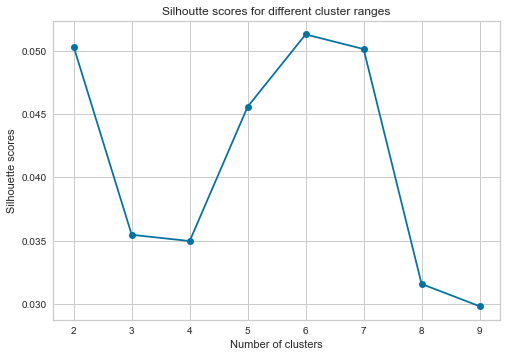

In [32]:
# Deciding on the number of clusters
scores = []
for cluster in range(2,10):
    agg_cluster = AgglomerativeClustering(n_clusters=cluster)
    agg_cluster.fit(training)
    predictions = agg_cluster.fit_predict(training)
    scores.append(silhouette_score(training,predictions))
fig , ax = plt.subplots()
ax.plot(range(2,10),scores,linestyle='-',marker='o')
ax.set_title('Silhoutte scores for different cluster ranges')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette scores')
plt.show()

In [33]:
# Making Agglomerative Clustering 4 clusters
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_cluster.fit(training)

AgglomerativeClustering(n_clusters=4)

In [34]:
# Making predictions for training and testing
agg_predictions_train = agg_cluster.fit_predict(training)
print('Training data predictions', agg_predictions_train)
agg_predictions_test = agg_cluster.fit_predict(testing)
print('Testing data predictions', agg_predictions_test)

Training data predictions [0 0 1 ... 0 0 1]
Testing data predictions [0 1 1 0 0 1 0 0 1 0 0 0 3 2 0 1 1 2 0 0 0 0 2 1 3 2 3 3 3 0 0 1 3 0 3 1 0
 0 3 3 2 0 0 0 2 3 2 0 0 1 2 2 1 3 0 2 1 2 0 3 3 2 2 3 1 2 1 1 0 1 2 2 2 3
 1 2 3 3 2 0 1 2 2 1 0 2 1 3 2 1 1 1 3 2 3 2 0 1 1 2 0 3 2 1 0 2 3 3 3 1 3
 3 0 2 0 0 1 3 0 1 1 2 2 3 3 1 3 0 3 0 0 2 3 0 3 0 0 0 2 1 1 0 3 2 1 0 3 3
 0 3 2 2 0 3 1 0 2 0 1 1 3 1 2 2 1 0 1 2 2 3 2 1 2 0 2 1 1 0 1 0 2 1 0 3 1
 2 1 2 2 2 0 1 1 3 1 3 1 2 2 0 1 2 2 0 1 1 3 0 0 3 0 2 2 2 3 1 0 3 0 2 3 0
 0 3 2 3 2 0 3 3 0 2 2 3 2 3 3 0 1 1 1 1 2 2 1 1 0 0 3 3 1 3 0 2 0 3 1 3 1
 2 3 3 1 1 2 2 0 1 1 2 1 0 2 1 2 3 1 0 0 1 1 0 1 1 0 2]


In [35]:
# Evaluating with silhoutte score for training and testing data
agg_score_train = silhouette_score(training,agg_predictions_train)
print('Score for training data', agg_score_train)
agg_score_test = silhouette_score(testing,agg_predictions_test)
print('Score for testing data', agg_score_test)

Score for training data 0.03497380732709454
Score for testing data 0.03981548688108328


Deciding on the best algorithm based on the predictions made

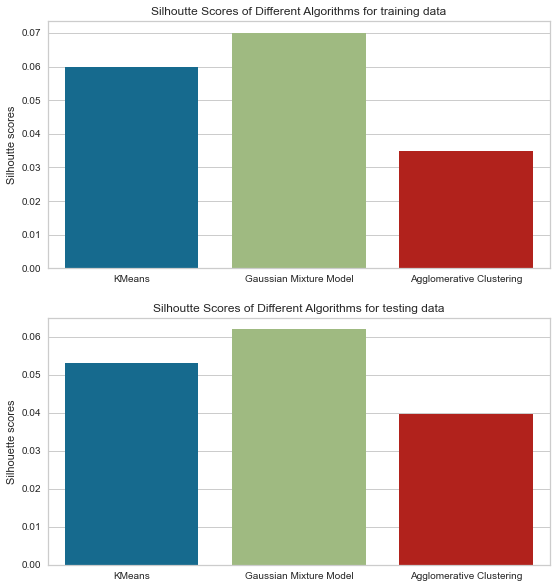

In [36]:
fig , (ax1,ax2) = plt.subplots(2,1,figsize=(9,10))
sns.barplot(x=['KMeans','Gaussian Mixture Model','Agglomerative Clustering'],y=[kmeans_score_train,gmm_score_train,agg_score_train],ax=ax1)
sns.barplot(x=['KMeans','Gaussian Mixture Model','Agglomerative Clustering'],y=[kmeans_score_test,gmm_score_test,agg_score_test],ax=ax2)
ax1.set_title('Silhoutte Scores of Different Algorithms for training data')
ax1.set_ylabel('Silhoutte scores')
ax2.set_title('Silhoutte Scores of Different Algorithms for testing data')
ax2.set_ylabel('Silhouette scores')
plt.show()

# Analysis of the clusters

In [37]:
# Predict all values for the dataset and assaign it to new labels column
df['Labels'] = gmm.predict(pca)

In [38]:
# Creating different dataframes for each cluster
df_cluster1 = df[df['Labels'] == 0]
df_cluster2 = df[df['Labels'] == 1]

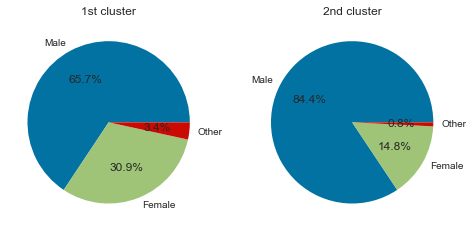

In [39]:
# Identifying different characteristics of each cluster by columns
# Gender
fig , (ax1,ax2) = plt.subplots(1,2)
ax1.pie(df_cluster1['Gender'].value_counts(normalize=True) * 100,labels=['Male','Female','Other'],autopct='%1.1f%%',)
ax1.set_title('1st cluster')
ax2.pie(df_cluster2['Gender'].value_counts(normalize=True) * 100,labels=['Male','Female','Other'],autopct='%1.1f%%')
ax2.set_title('2nd cluster')
plt.show()

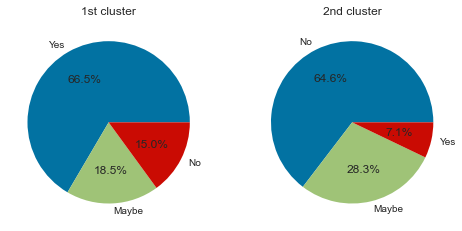

In [40]:
# Current condition of mental health disorder
fig , (ax1,ax2) = plt.subplots(1,2)
ax1.pie(df_cluster1['Current_condition_of_mental_health_disorder'].value_counts(normalize=True) * 100,labels=['Yes','Maybe','No'],autopct='%1.1f%%')
ax1.set_title('1st cluster')
ax2.pie(df_cluster2['Current_condition_of_mental_health_disorder'].value_counts(normalize=True) * 100,labels=['No','Maybe','Yes'],autopct='%1.1f%%')
ax2.set_title('2nd cluster')
plt.show()

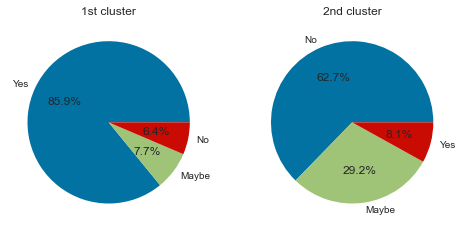

In [41]:
# History of mental health disorder
fig , (ax1,ax2) = plt.subplots(1,2)
ax1.pie(df_cluster1['History_of_mental_health_disorder'].value_counts(normalize=True) * 100,labels=['Yes','Maybe','No'],autopct='%1.1f%%')
ax1.set_title('1st cluster')
ax2.pie(df_cluster2['History_of_mental_health_disorder'].value_counts(normalize=True) * 100,labels=['No','Maybe','Yes'],autopct='%1.1f%%')
ax2.set_title('2nd cluster')
plt.show()

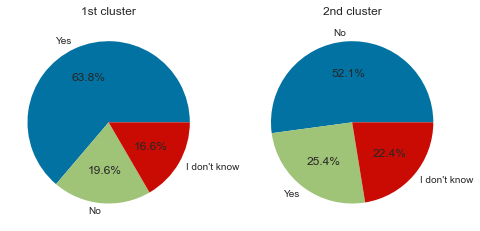

In [42]:
# Family history of mental illness
fig , (ax1,ax2) = plt.subplots(1,2)
ax1.pie(df_cluster1['Family_history_of_mental_illness'].value_counts(normalize=True) * 100,labels=['Yes','No','I don\'t know'],autopct='%1.1f%%')
ax1.set_title('1st cluster')
ax2.pie(df_cluster2['Family_history_of_mental_illness'].value_counts(normalize=True) * 100,labels=['No','Yes','I don\'t know'],autopct='%1.1f%%')
ax2.set_title('2nd cluster')
plt.show()

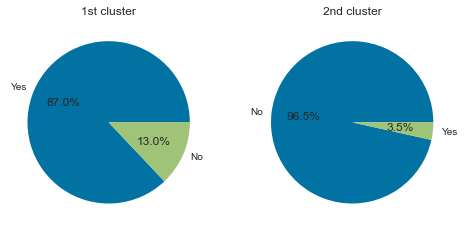

In [43]:
# Diagonised by medical professional
fig , (ax1,ax2) = plt.subplots(1,2)
ax1.pie(df_cluster1['Diagonised_by_medical_professional'].value_counts(normalize=True) * 100,labels=['Yes','No'],autopct='%1.1f%%')
ax1.set_title('1st cluster')
ax2.pie(df_cluster2['Diagonised_by_medical_professional'].value_counts(normalize=True) * 100,labels=['No','Yes'],autopct='%1.1f%%')
ax2.set_title('2nd cluster')
plt.show()

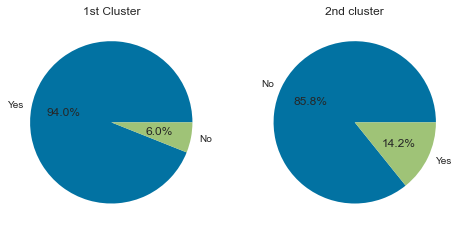

In [44]:
# Sought treatment from mental health professional
fig , (ax1,ax2) = plt.subplots(1,2)
ax1.pie(df_cluster1['Sought_treatment_from_mental_health_professional'].value_counts(normalize=True) * 100,labels=['Yes','No'],autopct='%1.1f%%')
ax1.set_title('1st Cluster')
ax2.pie(df_cluster2['Sought_treatment_from_mental_health_professional'].value_counts(normalize=True) * 100,labels=['No','Yes'],autopct='%1.1f%%')
ax2.set_title('2nd cluster')
plt.show()

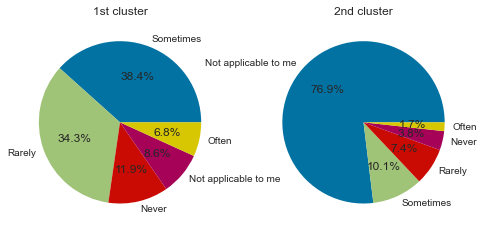

In [45]:
# Interference of mental health when in treatment
fig , (ax1,ax2) = plt.subplots(1,2)
ax1.pie(df_cluster1['Interference_of_mental_health_when_in_treatment'].value_counts(normalize=True) * 100,labels=['Sometimes','Rarely','Never','Not applicable to me','Often'],autopct='%1.1f%%')
ax1.set_title('1st cluster')
ax2.pie(df_cluster2['Interference_of_mental_health_when_in_treatment'].value_counts(normalize=True) * 100,labels=['Not applicable to me','Sometimes','Rarely','Never','Often'],autopct='%1.1f%%')
ax2.set_title('2nd cluster')
plt.show()

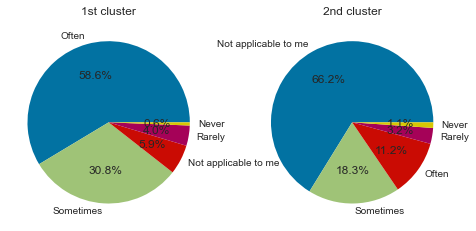

In [46]:
# Interference of mental health when not in treatment
fig , (ax1,ax2) = plt.subplots(1,2)
ax1.pie(df_cluster1['Interference_of_mental_health_when_not_in_treatment'].value_counts(normalize=True) * 100,labels=['Often','Sometimes','Not applicable to me','Rarely','Never'],autopct='%1.1f%%')
ax1.set_title('1st cluster')
ax2.pie(df_cluster2['Interference_of_mental_health_when_not_in_treatment'].value_counts(normalize=True) * 100,labels=['Not applicable to me','Sometimes','Often','Rarely','Never'],autopct='%1.1f%%')
ax2.set_title('2nd cluster')
plt.show()

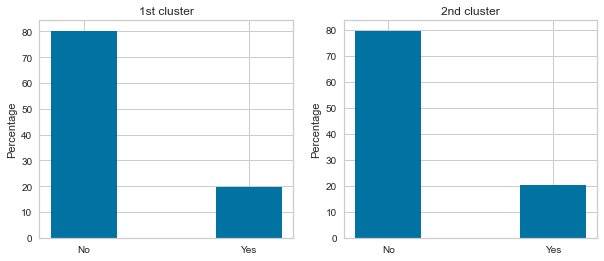

In [47]:
# Self employed
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.bar(['No','Yes'],df_cluster1['Self_employed'].value_counts(normalize=True) * 100,width=0.4)
ax1.set_title('1st cluster')
ax1.set_ylabel('Percentage')
ax2.bar(['No','Yes'],df_cluster2['Self_employed'].value_counts(normalize=True) * 100,width=0.4)
ax2.set_title('2nd cluster')
ax2.set_ylabel('Percentage')
plt.show()

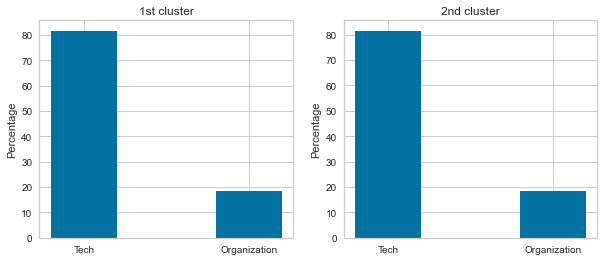

In [48]:
# Tech company or Organization
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.bar(['Tech','Organization'],df_cluster1['Tech_company_or_Organization'].value_counts(normalize=True) * 100,width=0.4)
ax1.set_title('1st cluster')
ax1.set_ylabel('Percentage')
ax2.bar(['Tech','Organization'],df_cluster2['Tech_company_or_Organization'].value_counts(normalize=True) * 100,width=0.4)
ax2.set_title('2nd cluster')
ax2.set_ylabel('Percentage')
plt.show()

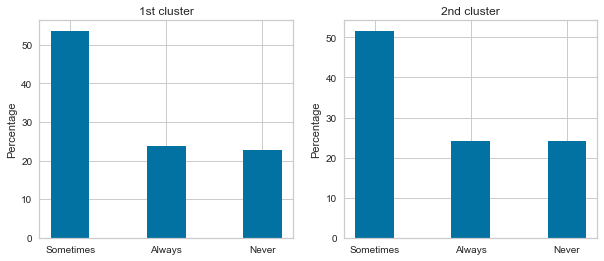

In [49]:
# Work remotely 
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.bar(['Sometimes','Always','Never'],df_cluster1['Work_remotely'].value_counts(normalize=True) * 100,width=0.4)
ax1.set_title('1st cluster')
ax1.set_ylabel('Percentage')
ax2.bar(['Sometimes','Always','Never'],df_cluster2['Work_remotely'].value_counts(normalize=True) * 100,width=0.4)
ax2.set_title('2nd cluster')
ax2.set_ylabel('Percentage')
plt.show()

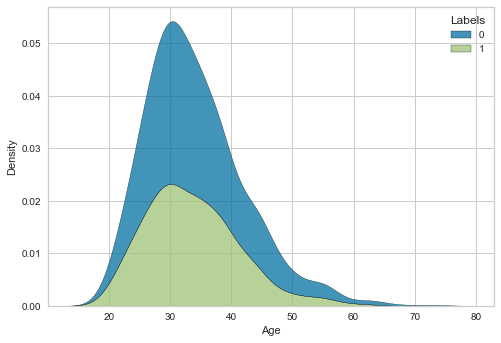

In [50]:
# Age
fig , ax = plt.subplots()
sns.kdeplot(data=df,x='Age',hue='Labels',multiple='stack')
plt.show()